In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"F:\DSA\Analytics Vidya\Black Friday Sales\train.csv")

In [3]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


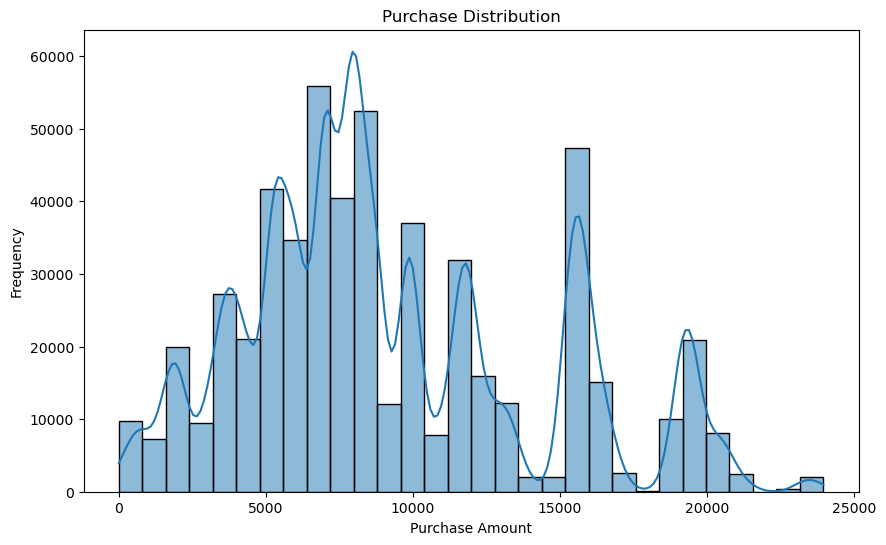

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Purchase'], bins=30, kde=True)
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

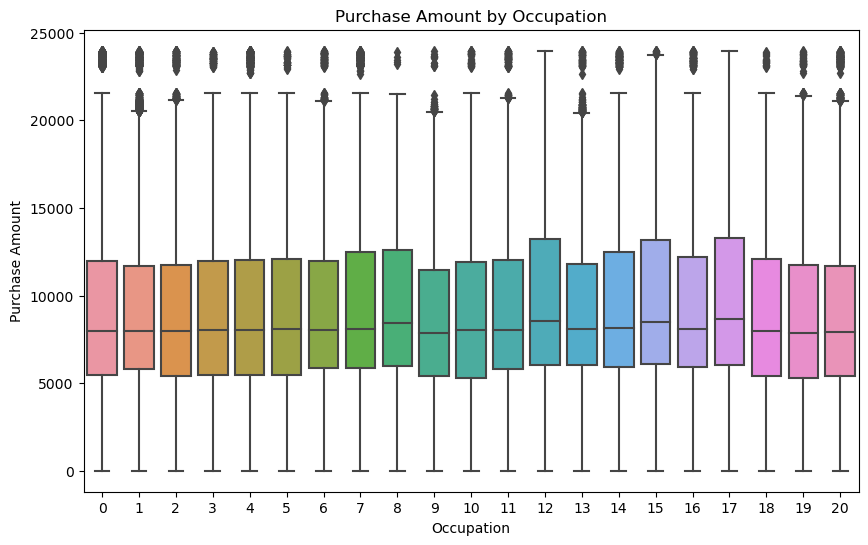

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Purchase', data=train_data)
plt.title('Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.show()

In [9]:
train_data['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

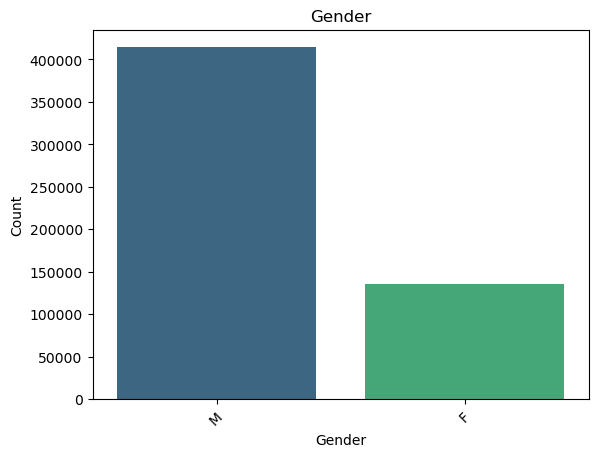

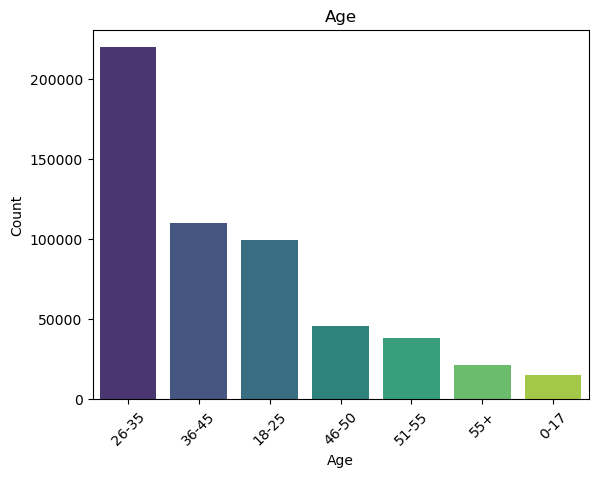

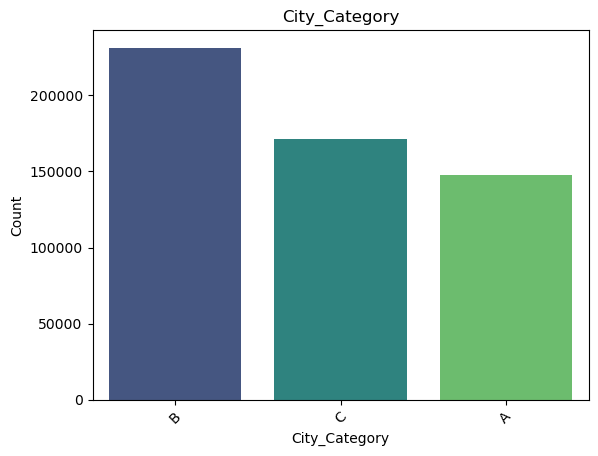

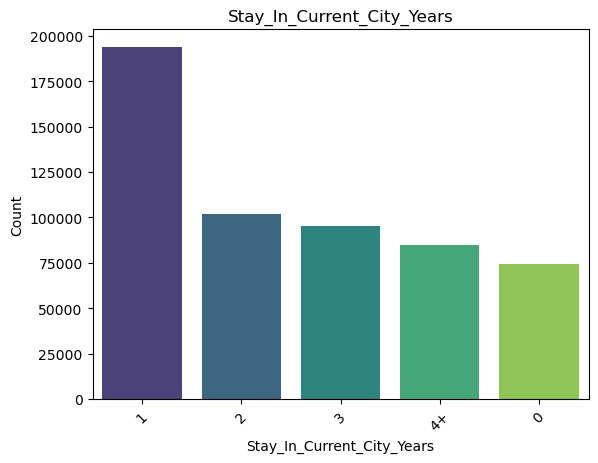

In [10]:
obj_data = train_data.select_dtypes(include='object').drop(columns=['Product_ID'])
for column in obj_data.columns:
    counts = train_data[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

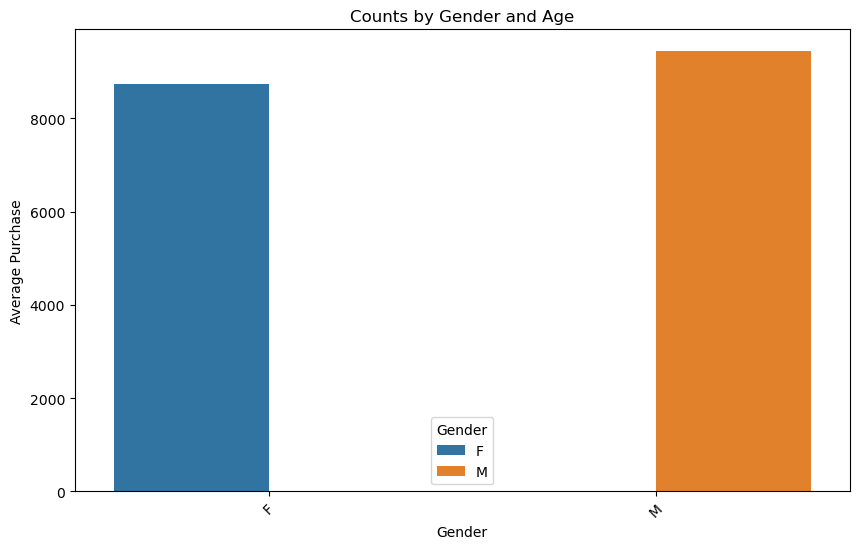

In [11]:
gender_mean = train_data.groupby('Gender')['Purchase'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_mean.index, y=gender_mean.values, hue=gender_mean.index.get_level_values(0))
plt.title('Counts by Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [12]:
gender_mean

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

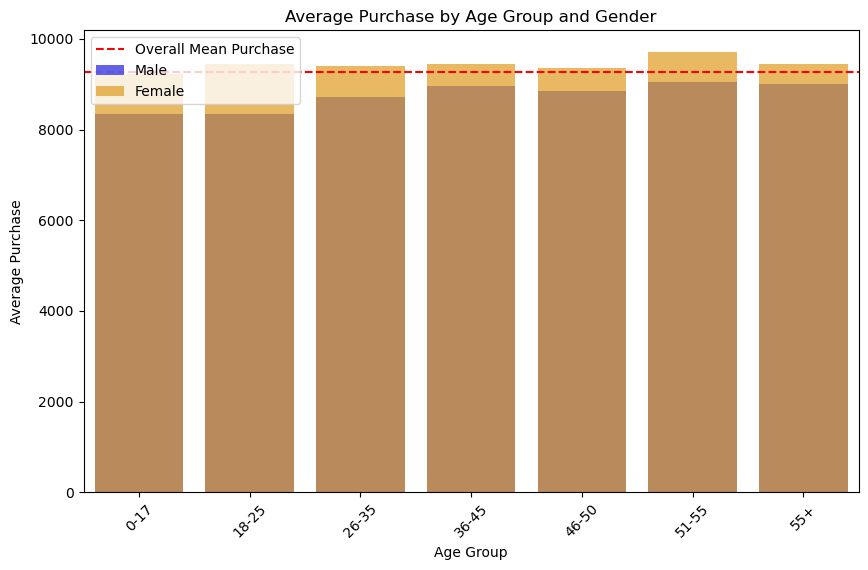

Age group(s) observations:
Gender            F            M
Age                             
51-55   9042.449666  9705.094802
36-45   8959.844056  9453.193643
18-25   8343.180201  9440.942971
55+     9007.036199  9438.195603
26-35   8728.251754  9410.337578
46-50   8842.098947  9357.471509
0-17    8338.771985  9235.173670


In [13]:
overall_mean_purchase = train_data['Purchase'].mean()
age_gender_mean = train_data.groupby(['Age', 'Gender'])['Purchase'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_gender_mean.index, y=age_gender_mean.values[:, 0], color='blue', label='Male', alpha=0.7)
sns.barplot(x=age_gender_mean.index, y=age_gender_mean.values[:, 1], color='orange', label='Female', alpha=0.7)
plt.axhline(y=overall_mean_purchase, color='red', linestyle='--', label='Overall Mean Purchase')
plt.title('Average Purchase by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.legend()
plt.show()
print("Age group(s) observations:")
print(age_gender_mean.sort_values(by='M', ascending=False))

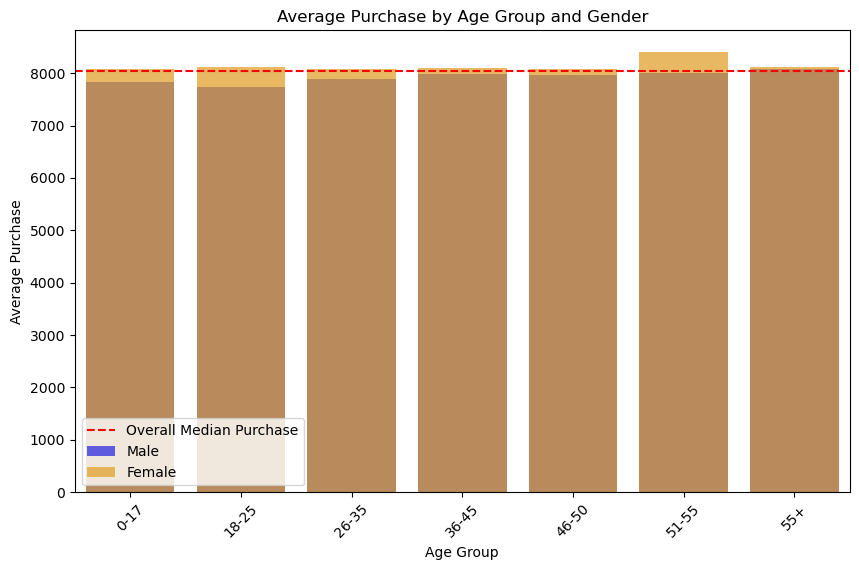

Age group(s) observation:
Gender       F       M
Age                   
51-55   8002.0  8398.0
18-25   7731.0  8119.0
55+     8084.0  8115.0
36-45   7984.0  8092.0
26-35   7886.0  8082.0
0-17    7824.0  8080.0
46-50   7957.0  8074.5


In [14]:
overall_median_purchase = train_data['Purchase'].median()
age_gender_median = train_data.groupby(['Age', 'Gender'])['Purchase'].median().unstack()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_gender_median.index, y=age_gender_median.values[:, 0], color='blue', label='Male', alpha=0.7)
sns.barplot(x=age_gender_median.index, y=age_gender_median.values[:, 1], color='orange', label='Female', alpha=0.7)
plt.axhline(y=overall_median_purchase, color='red', linestyle='--', label='Overall Median Purchase')
plt.title('Average Purchase by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.legend()
plt.show()
print("Age group(s) observation:")
print(age_gender_median.sort_values(by='M', ascending=False))

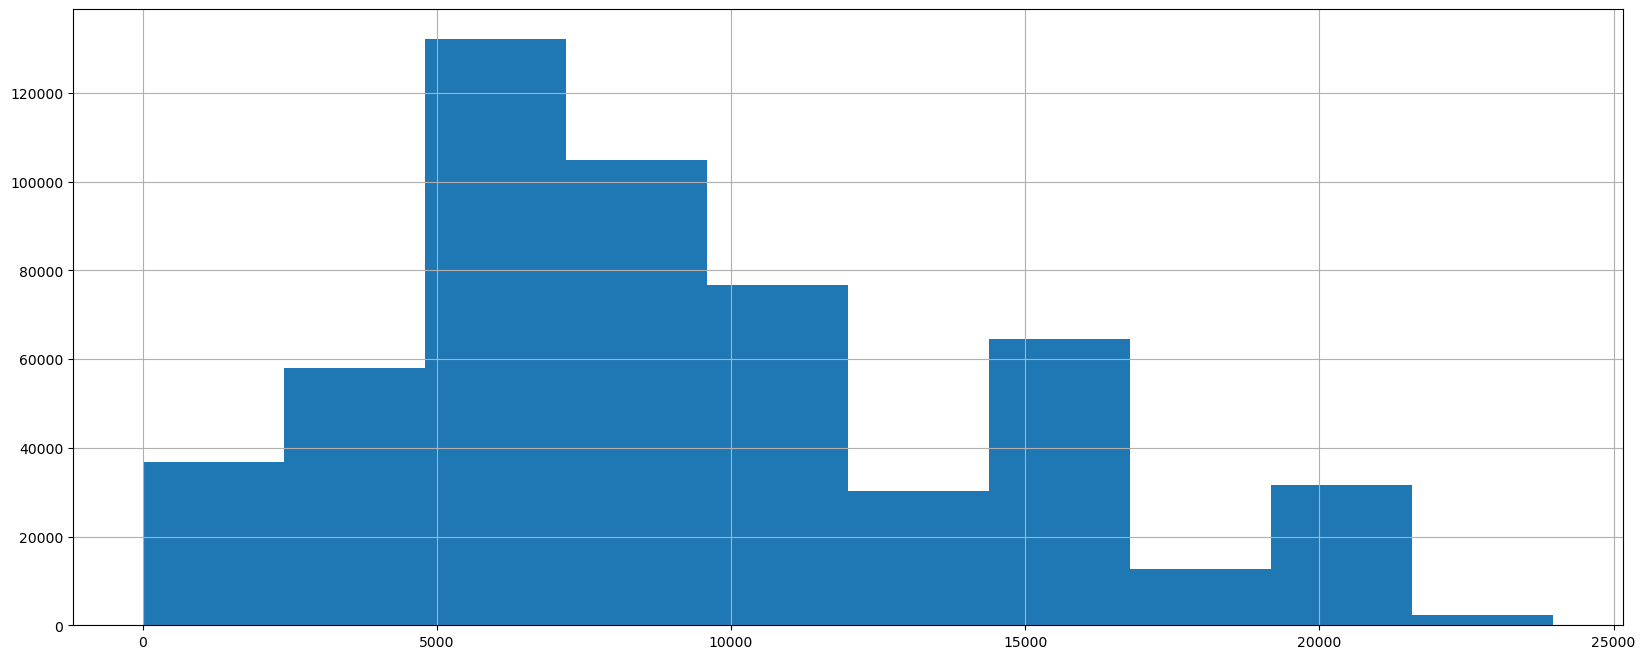

In [15]:
train_data['Purchase'].hist(figsize =(20,8))
plt.show()

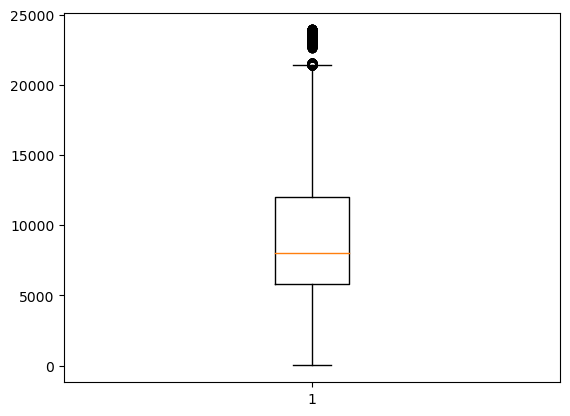

In [16]:
plt.boxplot(train_data['Purchase'])
plt.show()

In [17]:
import sklearn.preprocessing as sk

In [18]:
total_purchase_per_user = train_data.groupby('User_ID')['Purchase'].sum()
total_purchase_per_product = train_data.groupby('Product_ID')['Purchase'].sum()

In [19]:
total_purchase_per_user

User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [20]:
total_purchase_per_product

Product_ID
P00000142    12837476
P00000242     3967496
P00000342     1296475
P00000442      441173
P00000542      807212
               ...   
P0099442      2870383
P0099642        83710
P0099742       991948
P0099842       737312
P0099942        78019
Name: Purchase, Length: 3631, dtype: int64

In [21]:
user_counts = train_data['User_ID'].value_counts()
product_counts = train_data['Product_ID'].value_counts()

user_counts_df = pd.DataFrame({'User_ID': user_counts.index, 'User_Count': user_counts.values})
product_counts_df = pd.DataFrame({'Product_ID': product_counts.index, 'Product_Count': product_counts.values})

sorted_user_counts = user_counts_df.sort_values(by='User_Count', ascending=False)
sorted_product_counts = product_counts_df.sort_values(by='Product_Count', ascending=False)

In [22]:
sorted_user_counts

,User_ID,User_Count
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
...,...,...
5886,1002690,7
5887,1002111,7
5888,1005810,7
5889,1004991,7


In [23]:
sorted_product_counts

,Product_ID,Product_Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
...,...,...
3535,P00335642,1
3536,P00341542,1
3537,P00077242,1
3538,P00315142,1


In [24]:
# Group by User_ID and aggregate information
agg_data = train_data.groupby('User_ID').agg({
    'Purchase': 'sum', # Total purchase price
    'Product_ID': 'count', # Count of products purchased
    'Product_Category_1': lambda x: x.value_counts().get(1, 0), # Count of products in category 1
    'Product_Category_2': lambda x: x.value_counts().get(2, 0), # Count of products in category 2
    'Product_Category_3': lambda x: x.value_counts().get(3, 0), # Count of products in category 3
    'Gender': 'first', # User's gender
    'Occupation': 'first', # User's employment
    'City_Category': 'first', # User's city
    'Stay_In_Current_City_Years': 'first' # Stay in current city years
})

# Rename columns for clarity
agg_data.columns = ['Total_Purchase', 'Product_Count', 'Product_Category_1_Count', 
                           'Product_Category_2_Count', 'Product_Category_3_Count', 
                           'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']

# Reset index to make User_ID a regular column
agg_data.reset_index(inplace=True)

In [25]:
agg_data

,User_ID,Total_Purchase,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Gender,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,334093,35,4,2,0,F,10,A,2
1,1000002,810472,77,31,8,0,M,16,C,4+
2,1000003,341635,29,15,13,0,M,15,A,3
3,1000004,206468,14,13,4,0,M,7,B,2
4,1000005,821001,106,18,3,0,M,20,A,1
...,...,...,...,...,...,...,...,...,...,...
5886,1006036,4116058,514,86,29,1,F,15,B,4+
5887,1006037,1119538,122,14,3,0,F,1,C,4+
5888,1006038,90034,12,0,0,0,F,1,C,2
5889,1006039,590319,74,7,3,0,F,0,B,4+


In [26]:
# Fill null values in 'Product_Category_2' and 'Product_Category_3' columns with 0
train_data['Product_Category_2'].fillna(0, inplace=True)
train_data['Product_Category_3'].fillna(0, inplace=True)

# Define a custom aggregation function to count occurrences of each product category
def count_categories(x):
    category_counts = x.value_counts()
    return category_counts.reindex(range(1, 4), fill_value=0).sum()  # Sum the counts of all categories

# Group by User_ID and aggregate information
agg_data = train_data.groupby('User_ID').agg({
    'Purchase': 'sum',  # Total purchase price
    'Product_ID': 'count',  # Count of products purchased
    'Product_Category_1': count_categories,  # Count of products in category 1
    'Product_Category_2': count_categories,  # Count of products in category 2
    'Product_Category_3': count_categories,  # Count of products in category 3
    'Gender': 'first',  # User's gender
    'Occupation': 'first',  # User's employment
    'City_Category': 'first',  # User's city
    'Stay_In_Current_City_Years': 'first'  # Stay in current city years
})

# Rename columns for clarity
agg_data.columns = ['Total_Purchase', 'Product_Count', 'Product_Category_1_Count', 
                           'Product_Category_2_Count', 'Product_Category_3_Count', 
                           'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']

# Reset index to make User_ID a regular column
agg_data.reset_index(inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26260\2671088199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product_Category_2'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26260\2671088199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [27]:
agg_data

,User_ID,Total_Purchase,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Gender,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,334093,35,16,2,0,F,10,A,2
1,1000002,810472,77,32,8,0,M,16,C,4+
2,1000003,341635,29,18,13,0,M,15,A,3
3,1000004,206468,14,13,4,0,M,7,B,2
4,1000005,821001,106,21,4,0,M,20,A,1
...,...,...,...,...,...,...,...,...,...,...
5886,1006036,4116058,514,114,30,1,F,15,B,4+
5887,1006037,1119538,122,16,3,0,F,1,C,4+
5888,1006038,90034,12,2,0,0,F,1,C,2
5889,1006039,590319,74,22,3,0,F,0,B,4+


In [28]:
agg_data.isnull().sum()

User_ID                       0
Total_Purchase                0
Product_Count                 0
Product_Category_1_Count      0
Product_Category_2_Count      0
Product_Category_3_Count      0
Gender                        0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [29]:
agg_data['Average_Purchase_Per_User'] = agg_data['Total_Purchase'] / agg_data['Product_Count']

In [30]:
agg_data

,User_ID,Total_Purchase,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Average_Purchase_Per_User
0,1000001,334093,35,16,2,0,F,10,A,2,9545.514286
1,1000002,810472,77,32,8,0,M,16,C,4+,10525.610390
2,1000003,341635,29,18,13,0,M,15,A,3,11780.517241
3,1000004,206468,14,13,4,0,M,7,B,2,14747.714286
4,1000005,821001,106,21,4,0,M,20,A,1,7745.292453
...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,4116058,514,114,30,1,F,15,B,4+,8007.894942
5887,1006037,1119538,122,16,3,0,F,1,C,4+,9176.540984
5888,1006038,90034,12,2,0,0,F,1,C,2,7502.833333
5889,1006039,590319,74,22,3,0,F,0,B,4+,7977.283784


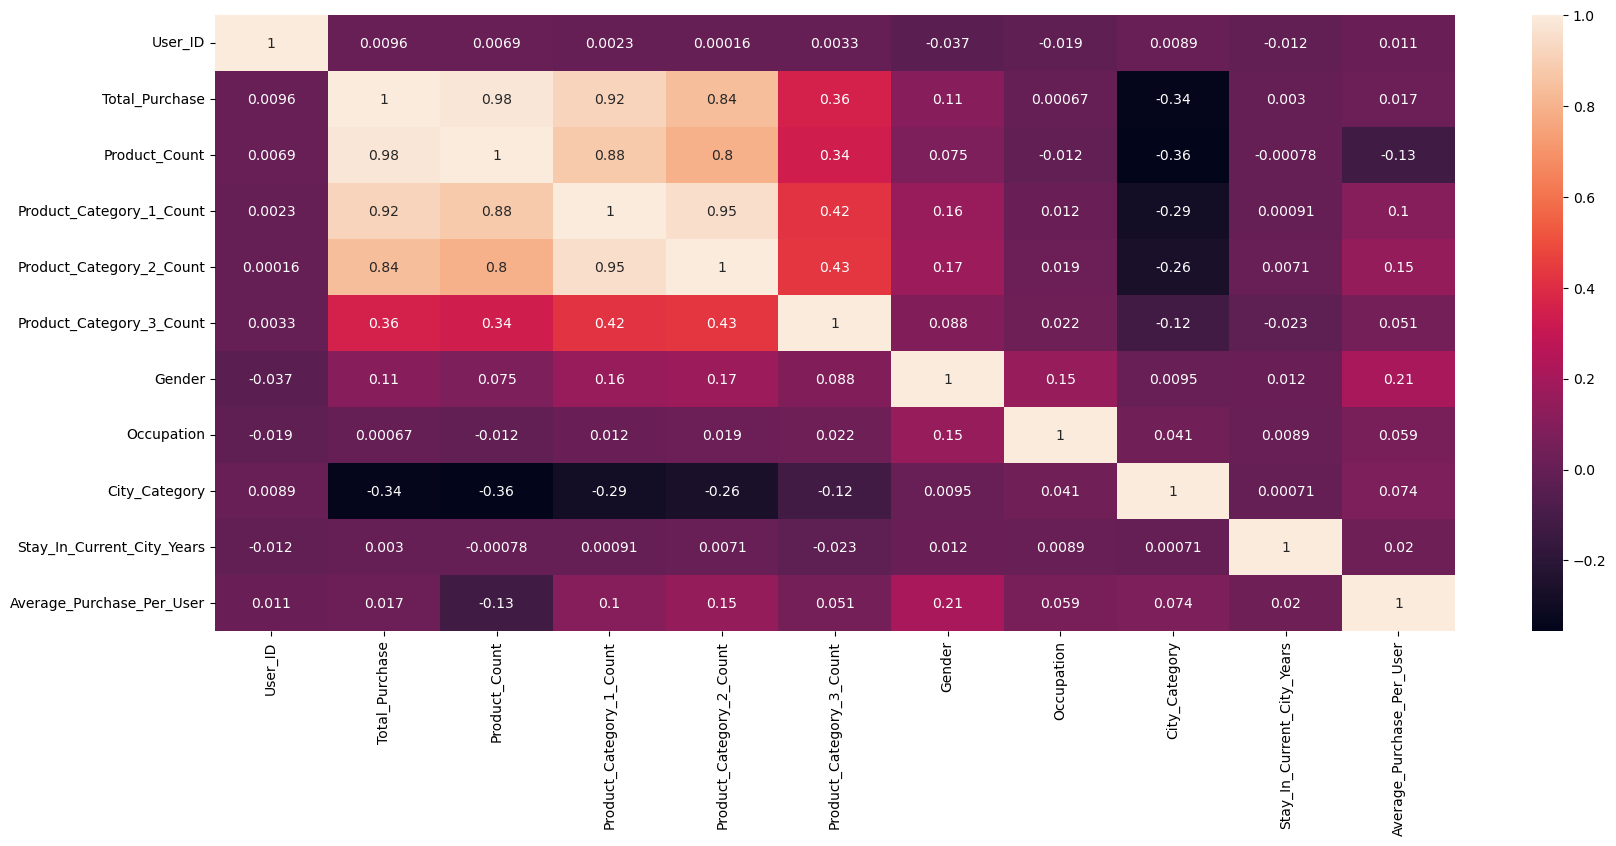

In [174]:
plt.subplots(figsize = (20,8))
sns.heatmap(agg_data.corr(), annot = True)
plt.show()

In [31]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     5891 non-null   int64  
 1   Total_Purchase              5891 non-null   int64  
 2   Product_Count               5891 non-null   int64  
 3   Product_Category_1_Count    5891 non-null   int64  
 4   Product_Category_2_Count    5891 non-null   int64  
 5   Product_Category_3_Count    5891 non-null   int64  
 6   Gender                      5891 non-null   object 
 7   Occupation                  5891 non-null   int64  
 8   City_Category               5891 non-null   object 
 9   Stay_In_Current_City_Years  5891 non-null   object 
 10  Average_Purchase_Per_User   5891 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 506.4+ KB


In [32]:
agg_data.describe()

,User_ID,Total_Purchase,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Occupation,Average_Purchase_Per_User
count,5.891000e+03,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,1.003025e+06,8.650166e+05,93.374300,31.311322,8.844169,0.104057,8.153285,9568.839914
std,1.743379e+03,9.436445e+05,107.190049,37.889929,10.910836,0.335559,6.323140,1890.087105
min,1.000001e+06,4.668100e+04,6.000000,0.000000,0.000000,0.000000,0.000000,2318.733333
25%,1.001518e+06,2.376780e+05,26.000000,7.000000,1.000000,0.000000,3.000000,8287.212366
50%,1.003026e+06,5.212130e+05,54.000000,16.000000,4.000000,0.000000,7.000000,9386.208333
75%,1.004532e+06,1.119250e+06,117.000000,42.000000,12.000000,0.000000,14.000000,10654.633199
max,1.006040e+06,1.053691e+07,1026.000000,286.000000,69.000000,3.000000,20.000000,18577.893617


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

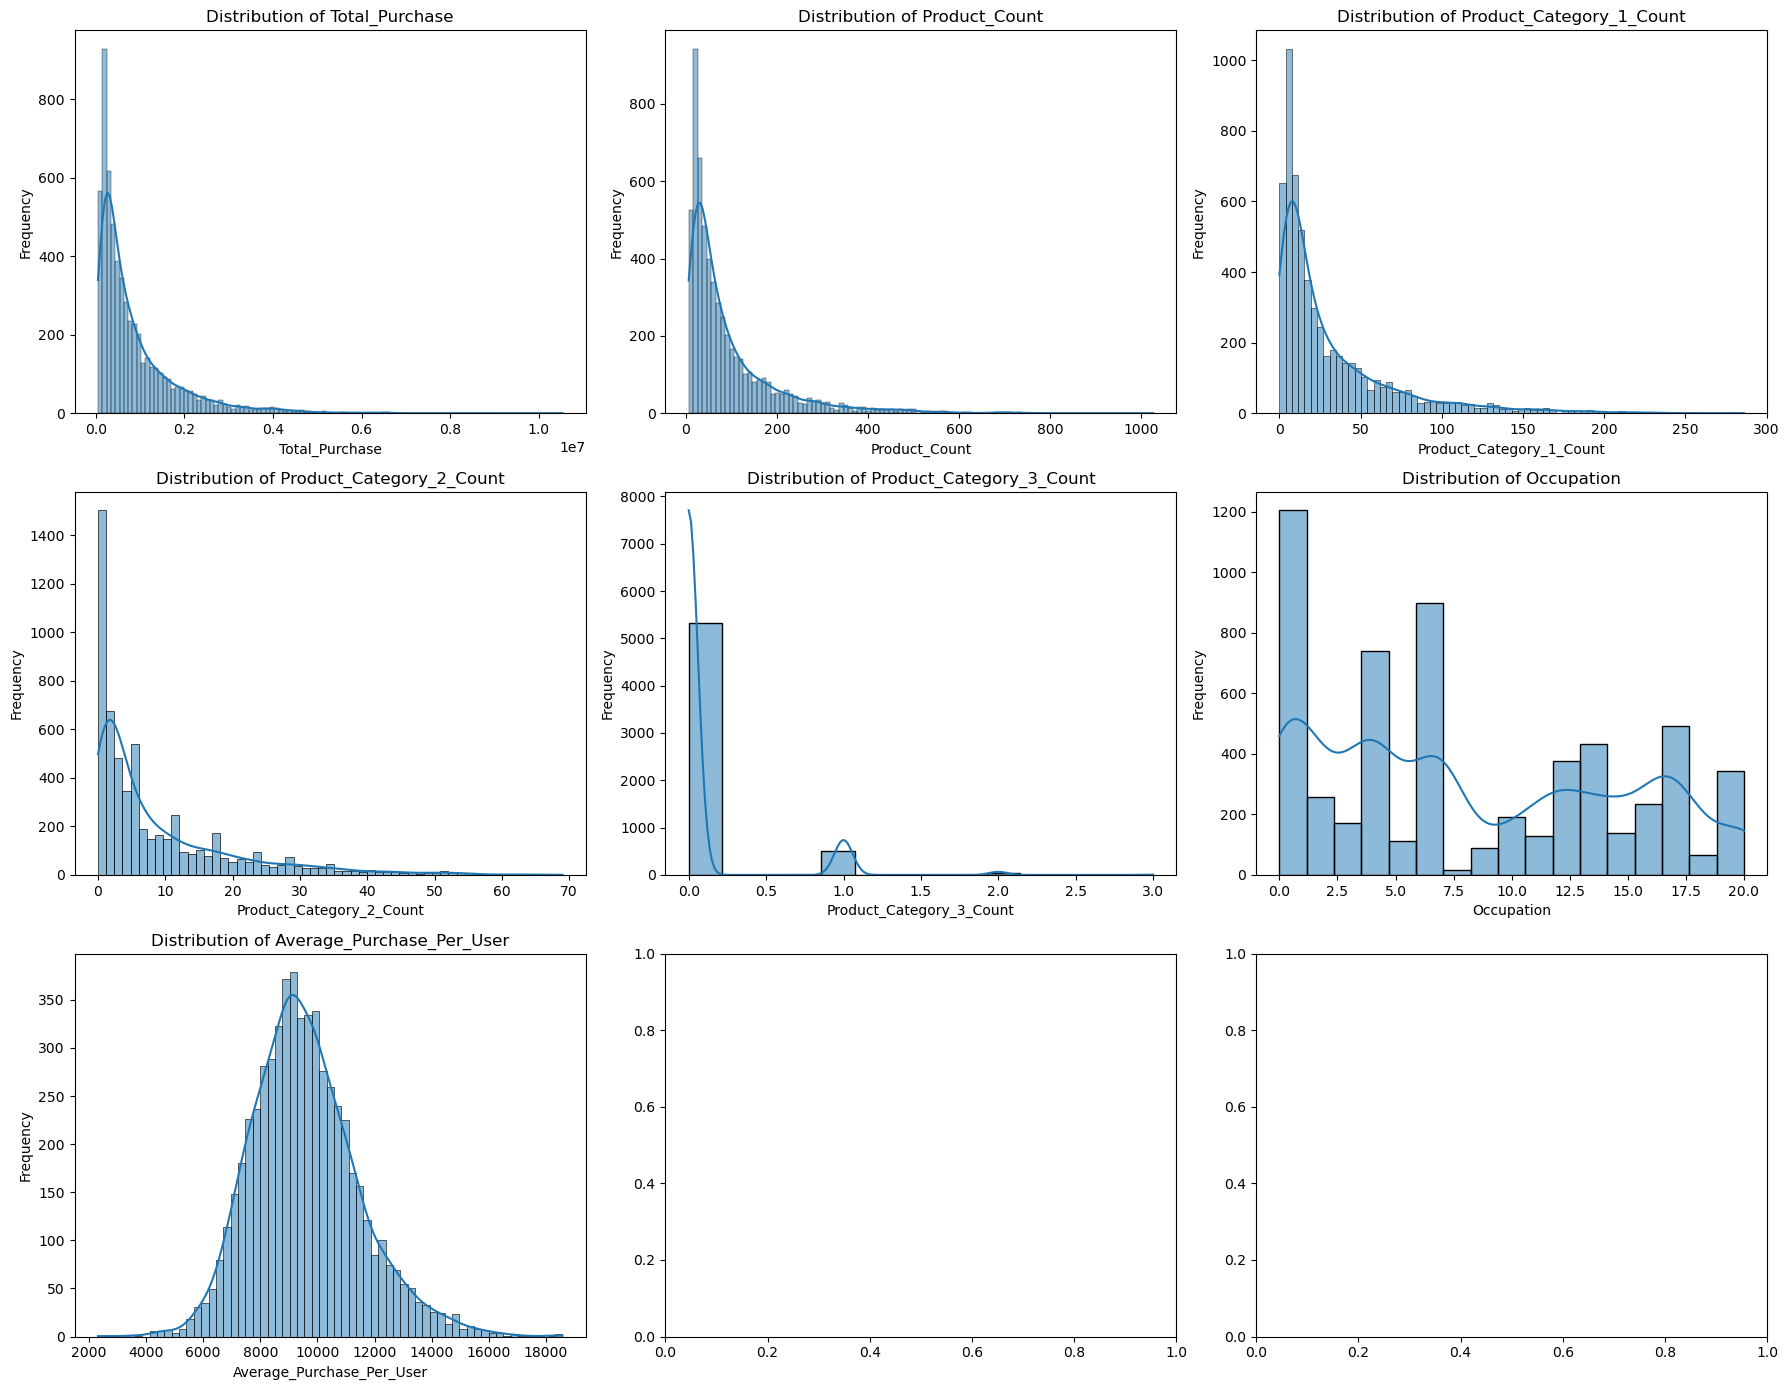

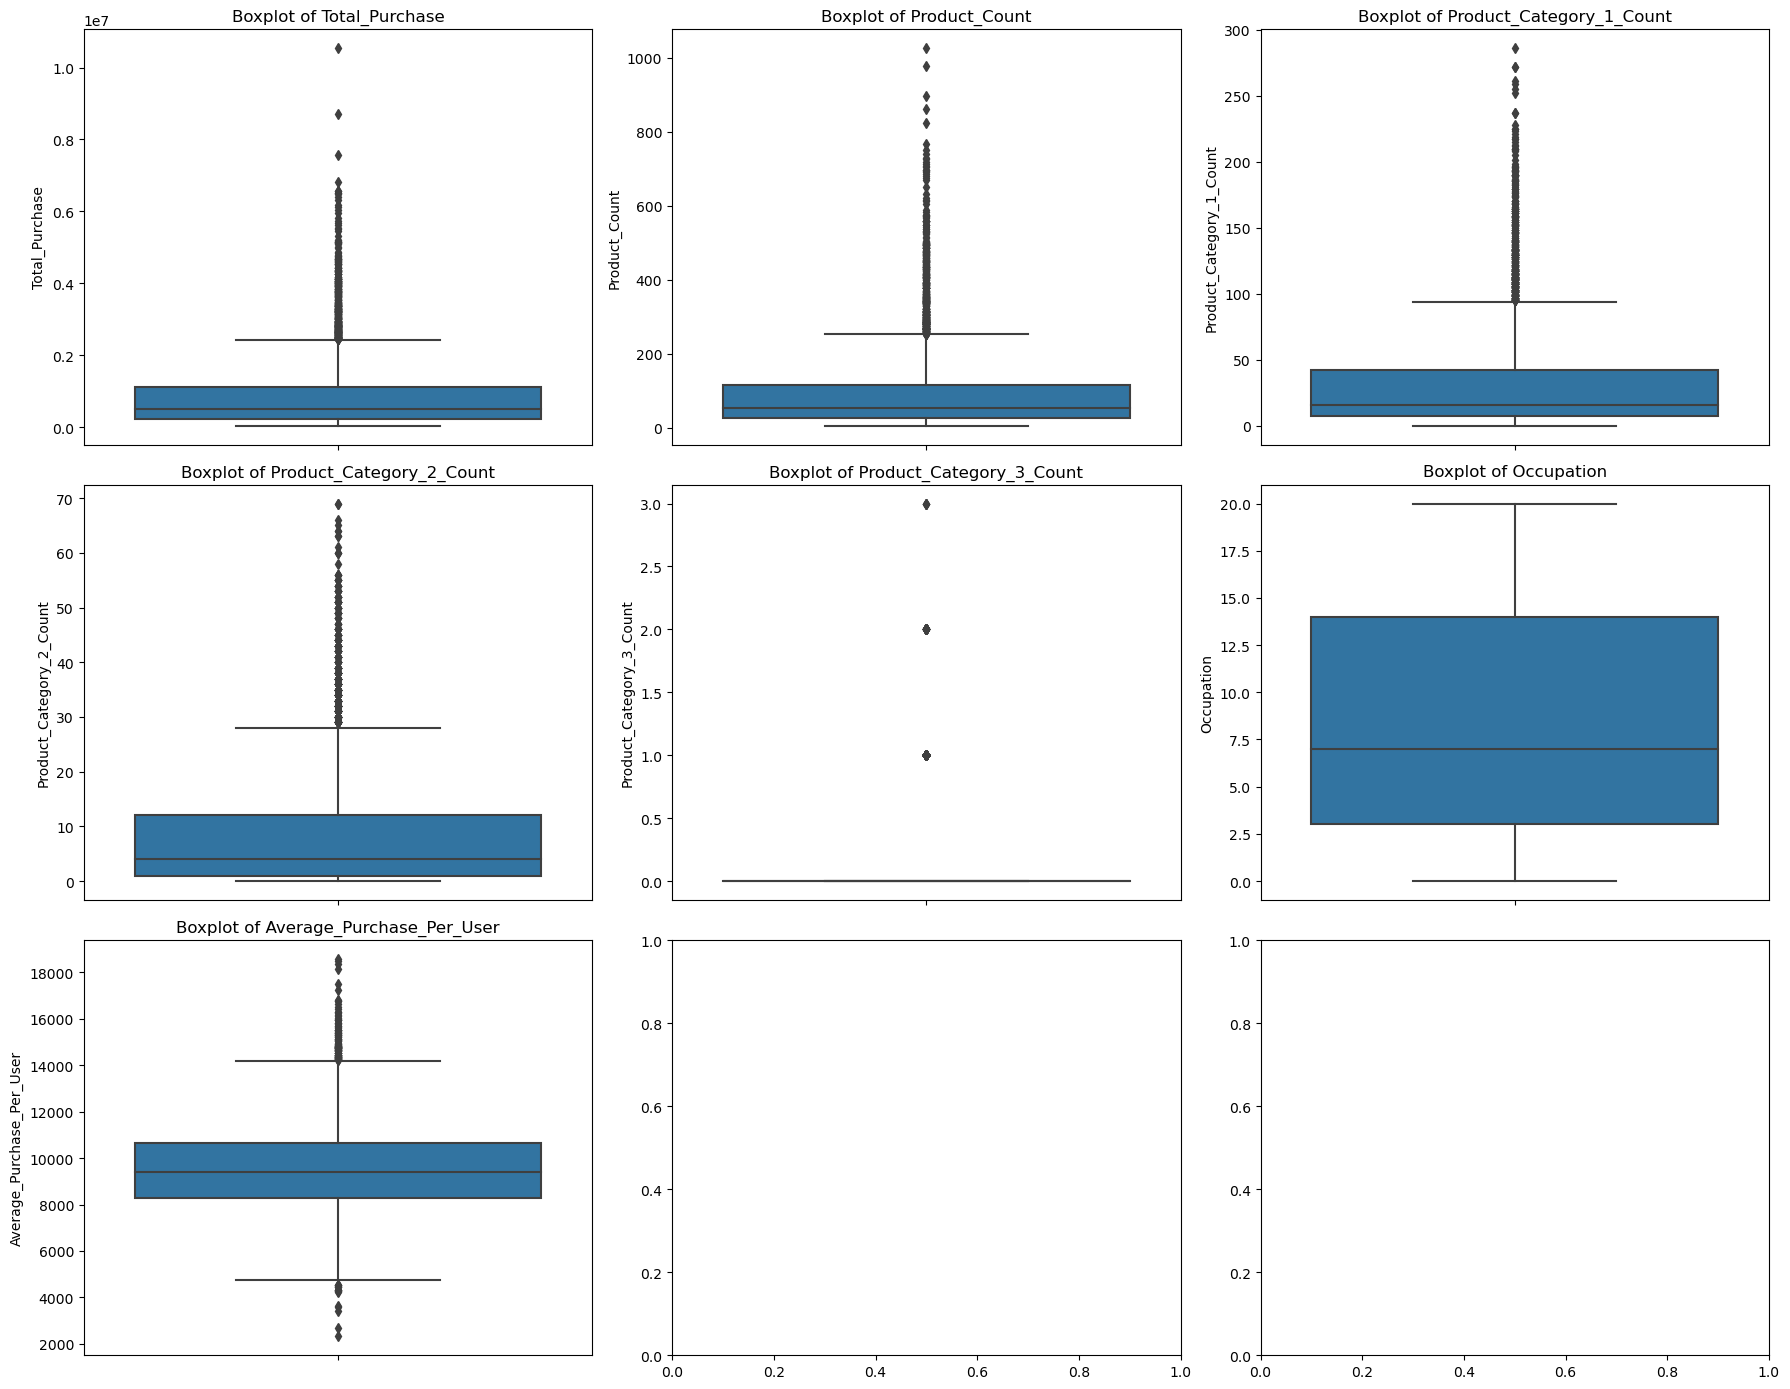

In [33]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

# Histograms for numerical variables
numerical_variables = ['Total_Purchase', 'Product_Count', 'Product_Category_1_Count',
                       'Product_Category_2_Count', 'Product_Category_3_Count', 'Occupation',
                       'Average_Purchase_Per_User']

for i, var in enumerate(numerical_variables):
    ax = axes[i//3, i%3]
    sns.histplot(data=agg_data, x=var, ax=ax, kde=True)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Boxplots for numerical variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

for i, var in enumerate(numerical_variables):
    ax = axes[i//3, i%3]
    sns.boxplot(data=agg_data, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

# Adjust layout
plt.tight_layout()
plt.show()

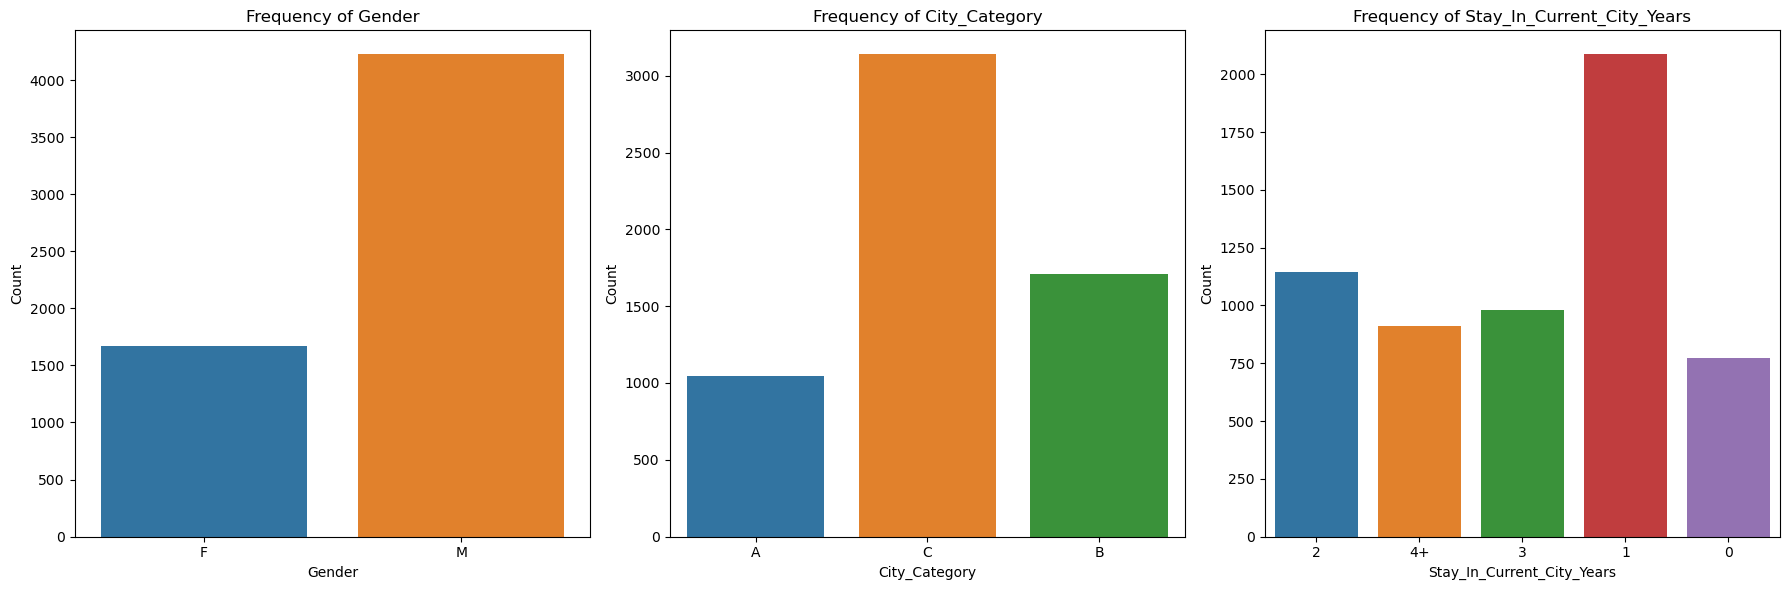

In [34]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Bar plots for categorical variables
categorical_variables = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']

for i, var in enumerate(categorical_variables):
    ax = axes[i]
    sns.countplot(data=agg_data, x=var, ax=ax)
    ax.set_title(f'Frequency of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [35]:
# Define the clipping range for each column
clip_ranges = {
    'Total_Purchase': (0, agg_data['Total_Purchase'].quantile(0.95)),
    'Product_Count': (0, agg_data['Product_Count'].quantile(0.95)),
    'Product_Category_1_Count': (0, agg_data['Product_Category_1_Count'].quantile(0.95)),
    'Product_Category_2_Count': (0, agg_data['Product_Category_2_Count'].quantile(0.95)),
    'Average_Purchase_Per_User': (0, agg_data['Average_Purchase_Per_User'].quantile(0.95))
}

# Apply clipping to each column
for col, (lower, upper) in clip_ranges.items():
    agg_data[col] = agg_data[col].clip(lower=lower, upper=upper)

# Check if outliers are effectively handled
agg_data.describe()

,User_ID,Total_Purchase,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Occupation,Average_Purchase_Per_User
count,5.891000e+03,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,1.003025e+06,8.122800e+05,86.859956,29.363266,8.385673,0.104057,8.153285,9509.942645
std,1.743379e+03,7.591899e+05,83.887880,31.290665,9.447790,0.335559,6.323140,1744.070853
min,1.000001e+06,4.668100e+04,6.000000,0.000000,0.000000,0.000000,0.000000,2318.733333
25%,1.001518e+06,2.376780e+05,26.000000,7.000000,1.000000,0.000000,3.000000,8287.212366
50%,1.003026e+06,5.212130e+05,54.000000,16.000000,4.000000,0.000000,7.000000,9386.208333
75%,1.004532e+06,1.119250e+06,117.000000,42.000000,12.000000,0.000000,14.000000,10654.633199
max,1.006040e+06,2.802434e+06,312.000000,113.000000,33.000000,3.000000,20.000000,12982.516018


In [36]:
import sklearn.preprocessing as sk
cols = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
le = sk.LabelEncoder()
for value in cols:
    agg_data[value] = le.fit_transform(agg_data[value])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = agg_data.drop(columns=['Total_Purchase', 'User_ID', 'Average_Purchase_Per_User' ])
y = agg_data['Total_Purchase']

# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Step 3: Choose a model (Linear Regression)
model = LinearRegression()

# Step 4: Train the model
model.fit(x_train, y_train)

# Step 5: Predict sales
y_pred = model.predict(x_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 14348618329.681147
R-squared score: 0.976335504856114


In [45]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize KFold with the specified number of splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store R-squared scores for each fold
r2_scores = []

# Iterate over each fold and perform cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(x_test)
    
    # Calculate R-squared score for the fold
    r2 = model.score(x_test, y_test)
    
    # Append R-squared score to the list
    r2_scores.append(r2)

# Calculate the mean R-squared score across all folds
mean_r2_score = np.mean(r2_scores)
print("Mean R-squared score:", mean_r2_score)

# Calculate cross-validated scores using cross_val_score
cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

# Calculate the mean cross-validated R-squared score
mean_cross_val_score = np.mean(cross_val_scores)
print("Mean cross-validated R-squared score:", mean_cross_val_score)

Mean R-squared score: 0.974698437227703
Mean cross-validated R-squared score: 0.9747482079649001


In [46]:
cross_val_scores

array([0.97376098, 0.97734128, 0.9742702 , 0.97523226, 0.97313633])

In [47]:
test_data = pd.read_csv(r"F:\DSA\Analytics Vidya\Black Friday Sales\test.csv")

In [143]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          233599 non-null  float64
 10  Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [48]:
# Fill null values in 'Product_Category_2' and 'Product_Category_3' columns with 0
test_data['Product_Category_2'].fillna(0, inplace=True)
test_data['Product_Category_3'].fillna(0, inplace=True)

# Define a custom aggregation function to count occurrences of each product category
def count_categories(x):
    category_counts = x.value_counts()
    return category_counts.reindex(range(1, 4), fill_value=0).sum()  # Sum the counts of all categories

# Group by User_ID and aggregate information
agg_test_data = test_data.groupby('User_ID').agg({
    'Product_ID': 'count',  
    'Product_Category_1': count_categories,  
    'Product_Category_2': count_categories, 
    'Product_Category_3': count_categories,  
    'Gender': 'first',  # User's gender
    'Occupation': 'first',  # User's employment
    'City_Category': 'first',  # User's city
    'Stay_In_Current_City_Years': 'first'  # Stay in current city years
})

# Rename columns for clarity
agg_test_data.columns = ['Product_Count', 'Product_Category_1_Count', 
                           'Product_Category_2_Count', 'Product_Category_3_Count', 
                           'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']

# Reset index to make User_ID a regular column
agg_test_data.reset_index(inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26260\1664610589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Product_Category_2'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26260\1664610589.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [49]:
agg_test_data

,User_ID,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Gender,Occupation,City_Category,Stay_In_Current_City_Years
0,1000001,12,5,1,0,F,10,A,2
1,1000002,30,16,5,0,M,16,C,4+
2,1000003,12,10,3,0,M,15,A,3
3,1000004,1,1,0,0,M,7,B,2
4,1000005,45,9,1,0,M,20,A,1
...,...,...,...,...,...,...,...,...,...
5886,1006036,205,68,13,0,F,15,B,4+
5887,1006037,41,7,1,0,F,1,C,4+
5888,1006038,9,3,1,0,F,1,C,2
5889,1006039,29,2,0,0,F,0,B,4+


In [114]:
# Define the clipping range for each column
clip_ranges = {
    'Product_Count': (0, agg_data['Product_Count'].quantile(0.95)),
    'Product_Category_1_Count': (0, agg_data['Product_Category_1_Count'].quantile(0.95)),
    'Product_Category_2_Count': (0, agg_data['Product_Category_2_Count'].quantile(0.95))
}

# Apply clipping to each column
for col, (lower, upper) in clip_ranges.items():
    agg_test_data[col] = agg_test_data[col].clip(lower=lower, upper=upper)

# Check if outliers are effectively handled
agg_test_data.describe()

,User_ID,Product_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Gender,Occupation,City_Category,Stay_In_Current_City_Years
count,5.891000e+03,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,1.003025e+06,39.574605,13.422339,3.822441,0.044984,0.717196,8.153285,1.355457,1.858598
std,1.743379e+03,45.517716,16.392352,4.891875,0.219228,0.450400,6.323140,0.764189,1.281394
min,1.000001e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001518e+06,11.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.003026e+06,23.000000,7.000000,2.000000,0.000000,1.000000,7.000000,2.000000,2.000000
75%,1.004532e+06,50.000000,18.000000,5.000000,0.000000,1.000000,14.000000,2.000000,3.000000
max,1.006040e+06,312.000000,113.000000,33.000000,3.000000,1.000000,20.000000,2.000000,4.000000


In [115]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     5891 non-null   int64  
 1   Total_Purchase              5891 non-null   float64
 2   Product_Count               5891 non-null   int64  
 3   Product_Category_1_Count    5891 non-null   int64  
 4   Product_Category_2_Count    5891 non-null   int64  
 5   Product_Category_3_Count    5891 non-null   int64  
 6   Gender                      5891 non-null   int32  
 7   Occupation                  5891 non-null   int64  
 8   City_Category               5891 non-null   int32  
 9   Stay_In_Current_City_Years  5891 non-null   int32  
 10  Average_Purchase_Per_User   5891 non-null   float64
dtypes: float64(2), int32(3), int64(6)
memory usage: 437.4 KB


In [116]:
agg_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   User_ID                     5891 non-null   int64
 1   Product_Count               5891 non-null   int64
 2   Product_Category_1_Count    5891 non-null   int64
 3   Product_Category_2_Count    5891 non-null   int64
 4   Product_Category_3_Count    5891 non-null   int64
 5   Gender                      5891 non-null   int64
 6   Occupation                  5891 non-null   int64
 7   City_Category               5891 non-null   int64
 8   Stay_In_Current_City_Years  5891 non-null   int64
dtypes: int64(9)
memory usage: 414.3 KB


In [117]:
model.fit(x_train, y_train)

LinearRegression()

In [118]:
import sklearn.preprocessing as sk
cols = ['Gender', 'City_Category', 'Stay_In_Current_City_Years']
le = sk.LabelEncoder()
for value in cols:
    agg_test_data[value] = le.fit_transform(agg_test_data[value])

In [119]:
predictions = model.predict(agg_test_data.drop(['User_ID'], axis = 1))

In [120]:
predictions

array([131943.63642504, 353949.01930591, 187731.69342952, ...,
        96074.06013032, 234017.92402848, 775738.64999545])

In [121]:
purchase = predictions/agg_test_data['Product_Count']

In [122]:
purchase

0       10995.303035
1       11798.300644
2       15644.307786
3       53708.047475
4        9243.004686
            ...     
5886     9024.407090
5887     8493.030914
5888    10674.895570
5889     8069.583587
5890     8431.941848
Name: Product_Count, Length: 5891, dtype: float64

In [123]:
purchase.mean()

11481.671550082183

In [124]:
purchase.median()

10546.04120903851

In [125]:
purchase.std()

3450.528754248599

In [126]:
train_data['Purchase'].mean()

9263.968712959126

In [127]:
train_data['Purchase'].std()

5023.065393820627

In [128]:
train_data['Purchase'].median()

8047.0

In [129]:
from sklearn.neighbors import KNeighborsRegressor

In [130]:
k_model = KNeighborsRegressor()

In [131]:
k_model.fit(x_train, y_train)
y_pred_knn = k_model.predict(x_test)

In [132]:
r2 = r2_score(y_test, y_pred)

In [133]:
r2

0.9765905485324137

In [134]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

r2_scores = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    k_model.fit(x_train, y_train)
    y_pred = k_model.predict(x_test)
    r2 = k_model.score(x_test, y_test)
    r2_scores.append(r2)


mean_r2_score = np.mean(r2_scores)
print("Mean R-squared score:", mean_r2_score)

cross_val_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
mean_cross_val_score = np.mean(cross_val_scores)
print("Mean cross-validated R-squared score:", mean_cross_val_score)

Mean R-squared score: 0.9713119182743801
Mean cross-validated R-squared score: 0.9747482079649001


In [135]:
r2_scores

[0.972060287472952,
 0.9761072416751286,
 0.9728005144921906,
 0.97655941091203,
 0.9731519504908122,
 0.9638983043998842,
 0.9688124120808661,
 0.9664057692888219,
 0.9667327433987012,
 0.9765905485324137]

In [136]:
predictions = k_model.predict(agg_test_data.drop(['User_ID'], axis = 1))

In [137]:
purchase = predictions/agg_test_data['Product_Count']

In [138]:
purchase.mean()

10564.554144038084

In [139]:
purchase.median()

9793.511409395973

In [140]:
purchase.std()

3638.4297170030686

In [141]:
agg_data['Product_Count'].sum()

511692

In [142]:
agg_test_data['Product_Count'].sum()

233134

In [146]:
from sklearn.neighbors import NearestNeighbors

# Assuming you have a fitted model:
nn = NearestNeighbors(n_neighbors=5)  # Or a different value for n_neighbors
nn.fit(x_train)  # Fit on your training data

# Then, to find nearest neighbors for x_test:
distances, indices = nn.kneighbors(x_test)

In [153]:
import math

4.51351666838205

In [154]:
import xgboost as xg

In [155]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 42)

In [156]:
xgb_r.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [157]:
predictions = xgb_r.predict(agg_test_data.drop(['User_ID'], axis = 1))

In [158]:
predictions

array([137582.75, 341649.2 , 185646.56, ..., 108726.03, 271463.56,
       783444.3 ], dtype=float32)

In [159]:
purchase = predictions/agg_test_data['Product_Count']

In [160]:
purchase.mean()

12416.28930512956

In [170]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    k_model.fit(x_train, y_train)
    y_pred = xgb_r.predict(x_test)
    r2 = xgb_r.score(x_test, y_test)
    r2_scores.append(r2)


mean_r2_score = np.mean(r2_scores)
print("Mean R-squared score:", mean_r2_score)

cross_val_scores = cross_val_score(xgb_r, x, y, cv=5, scoring='r2')
mean_cross_val_score = np.mean(cross_val_scores)
print("Mean cross-validated R-squared score:", mean_cross_val_score)

Mean R-squared score: 0.9784303000115622
Mean cross-validated R-squared score: 0.9729530542886087


C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:03:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:03:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:03:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  w

In [163]:
from sklearn.linear_model import Lasso

In [165]:
lasso =Lasso( alpha = 0.1 )

In [166]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [167]:
predictions = lasso.predict(agg_test_data.drop('User_ID', axis = 1))

In [168]:
predictions

array([131944.30051295, 353948.63943366, 187731.78127498, ...,
        96074.31921138, 234018.25180391, 775738.49331326])

In [171]:
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    k_model.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    r2 = lasso.score(x_test, y_test)
    r2_scores.append(r2)


mean_r2_score = np.mean(r2_scores)
print("Mean R-squared score:", mean_r2_score)

cross_val_scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mean_cross_val_score = np.mean(cross_val_scores)
print("Mean cross-validated R-squared score:", mean_cross_val_score)

Mean R-squared score: 0.9778262374486008
Mean cross-validated R-squared score: 0.9747482083557661


In [175]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [176]:
train_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [177]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [179]:
import sklearn.preprocessing as sk
cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_ID']
le = sk.LabelEncoder()
for value in cols:
    train_data[value] = le.fit_transform(train_data[value])

In [180]:
x = train_data.drop(['User_ID', 'Purchase'], axis = 1)
y = train_data['Purchase']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

linear = LinearRegression()

# Step 4: Train the model
linear.fit(x_train, y_train)

# Step 5: Predict sales
y_pred = linear.predict(x_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 21245299.459260684
R-squared score: 0.155392577937984


In [182]:
xgb_r.fit(x_train, y_train)
y_pred = xgb_r.predict(x_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 8248492.271473669
R-squared score: 0.6720809792929945


C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:41:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [183]:
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 21245298.267174803
R-squared score: 0.1553926253293887


In [184]:
from sklearn.linear_model import Ridge

In [185]:
rg_r = Ridge()

In [186]:
rg_r.fit(x_train, y_train)
y_pred = rg_r.predict(x_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 21245299.44880101
R-squared score: 0.1553925783538086
